In [1]:
### Dados:

#O dataset fornece o resultado de uma campanha de marketing para cada usuário (sim - comprou / nao - não comprou)

#Temos como variáveis:

#Dados do cliente:
#   1 - idade
#   2 - profissao
#   3 - estado_civil
#   4 - educacao
#   5 - inadimplente
#   6 - emprestimo_moradia: possui empréstimo para moradia?
#   7 - emprestimo_pessoal: possui empréstimo pessoal?
#Dados relacionados com últimos contatos:
#   8 - meio_contato: tipo de contato
#   9 - mes: último mês de contato
#  10 - dia_da_semana: último dia da semana de contato
#  11 - duracao: última duração do contato, em segundos. Nota: este atributo causa overfitting no modelo.
#Outras variáveis:
#  12 - qtd_contatos_campanha: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#  13 - dias_ultimo_contato: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#  14 - qtd_contatos_total: number of contacts performed before this campaign and for this client (numeric)
#  15 - campanha_anterior: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
#Variáveis de contexto econômico e social:
#  16 - indice_precos_consumidor: mensal 
#  17 - indice_confianca_consumidor: mensal
#  18 - euribor3m: EURIBOR (European Interbank Offered Rate) diário
#  19 - numero_empregados: quaternário
  

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly
import datetime
import seaborn as sns
%matplotlib inline

In [3]:
call_center = pd.read_csv('teste_tecnico/callcenter_marketing.csv')

In [4]:
call_center.columns

Index(['Unnamed: 0', 'idade', 'profissao', 'estado_civil', 'educacao',
       'inadimplente', 'emprestimo_moradia', 'emprestimo_pessoal',
       'meio_contato', 'mes', 'dia_da_semana', 'duracao',
       'qtd_contatos_campanha', 'dias_ultimo_contato', 'qtd_contatos_total',
       'campanha_anterior', 'indice_precos_consumidor',
       'indice_confianca_consumidor', 'euribor3m', 'numero_empregados',
       'resultado'],
      dtype='object')

In [5]:
call_center.head(5)

,Unnamed: 0,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,...,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
0,0,56,dona_casa,casado,fundamental_4a,nao,nao,nao,telefone,mai,...,261,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
1,1,57,servicos,casado,ensino_medio,NaN,nao,nao,telefone,mai,...,149,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
2,2,37,servicos,casado,ensino_medio,nao,sim,nao,telefone,mai,...,226,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
3,3,40,admin.,casado,fundamental_6a,nao,nao,nao,telefone,mai,...,151,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
4,4,56,servicos,casado,ensino_medio,nao,nao,sim,telefone,mai,...,307,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao


## Tratamento dos Dados

In [6]:
#excluindo algumas colunas
call_center.drop(['Unnamed: 0','euribor3m','duracao','numero_empregados','dias_ultimo_contato'], axis = 1, inplace = True)

In [7]:
call_center.head(5)

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,qtd_contatos_campanha,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,resultado
0,56,dona_casa,casado,fundamental_4a,nao,nao,nao,telefone,mai,seg,1,0,nao_existente,93.994,-36.4,nao
1,57,servicos,casado,ensino_medio,NaN,nao,nao,telefone,mai,seg,1,0,nao_existente,93.994,-36.4,nao
2,37,servicos,casado,ensino_medio,nao,sim,nao,telefone,mai,seg,1,0,nao_existente,93.994,-36.4,nao
3,40,admin.,casado,fundamental_6a,nao,nao,nao,telefone,mai,seg,1,0,nao_existente,93.994,-36.4,nao
4,56,servicos,casado,ensino_medio,nao,nao,sim,telefone,mai,seg,1,0,nao_existente,93.994,-36.4,nao


#### Verificar valores nulos

In [8]:
call_center.isnull()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,qtd_contatos_campanha,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,resultado
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Análise Exploratória

### Tratamento de Missing Values

In [9]:
## Optei por remover os valores nulos devido ser uma pesquisa com muitos valores.
call_center.dropna().head(5)

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,qtd_contatos_campanha,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,resultado
0,56,dona_casa,casado,fundamental_4a,nao,nao,nao,telefone,mai,seg,1,0,nao_existente,93.994,-36.4,nao
2,37,servicos,casado,ensino_medio,nao,sim,nao,telefone,mai,seg,1,0,nao_existente,93.994,-36.4,nao
3,40,admin.,casado,fundamental_6a,nao,nao,nao,telefone,mai,seg,1,0,nao_existente,93.994,-36.4,nao
4,56,servicos,casado,ensino_medio,nao,nao,sim,telefone,mai,seg,1,0,nao_existente,93.994,-36.4,nao
6,59,admin.,casado,curso_tecnico,nao,nao,nao,telefone,mai,seg,1,0,nao_existente,93.994,-36.4,nao


### Tipos de variáveis

In [10]:
call_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
idade                          41188 non-null int64
profissao                      40858 non-null object
estado_civil                   41108 non-null object
educacao                       39457 non-null object
inadimplente                   32591 non-null object
emprestimo_moradia             40198 non-null object
emprestimo_pessoal             40198 non-null object
meio_contato                   41188 non-null object
mes                            41188 non-null object
dia_da_semana                  41188 non-null object
qtd_contatos_campanha          41188 non-null int64
qtd_contatos_total             41188 non-null int64
campanha_anterior              41188 non-null object
indice_precos_consumidor       41188 non-null float64
indice_confianca_consumidor    41188 non-null float64
resultado                      41188 non-null object
dtypes: float64(2), int64(3), object(11)
mem

### Medidas de posição

In [11]:
### Descrição da quantidade de registro por coluna
### Média dos valores por coluna
### Desvio padrão por coluna
### Valor mínimo por coluna
### Primeiro Quartis: 25%
### Mediana: 50%
### Terceiro Quartis: 75%
### Valor Maximo por coluna
call_center.describe()

,idade,qtd_contatos_campanha,qtd_contatos_total,indice_precos_consumidor,indice_confianca_consumidor
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,0.172963,93.575664,-40.502600
std,10.42125,2.770014,0.494901,0.578840,4.628198
min,17.00000,1.000000,0.000000,92.201000,-50.800000
25%,32.00000,1.000000,0.000000,93.075000,-42.700000
50%,38.00000,2.000000,0.000000,93.749000,-41.800000
75%,47.00000,3.000000,0.000000,93.994000,-36.400000
max,98.00000,56.000000,7.000000,94.767000,-26.900000


### Medidas de dispersão

##### Dispersão por "RESULTADO" / (sim - comprou / nao - não comprou)

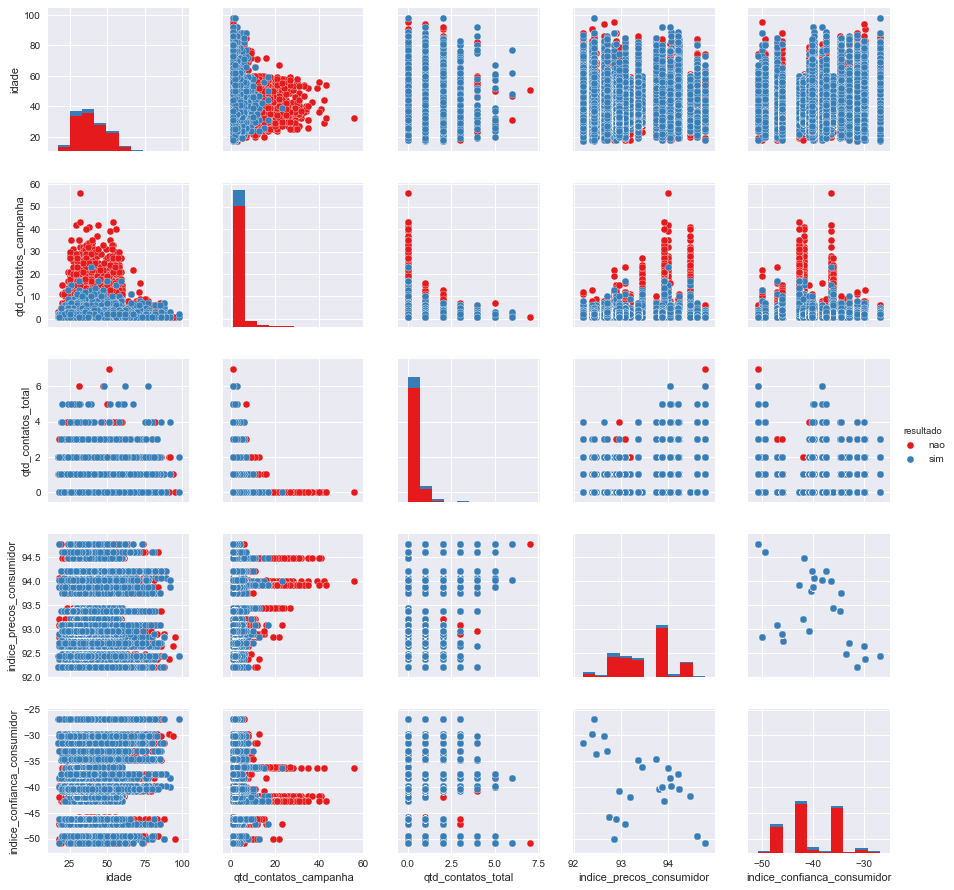

In [12]:
sns.pairplot(call_center,hue='resultado',palette='Set1')

##### Dispersão por "ESTADO CIVIL"

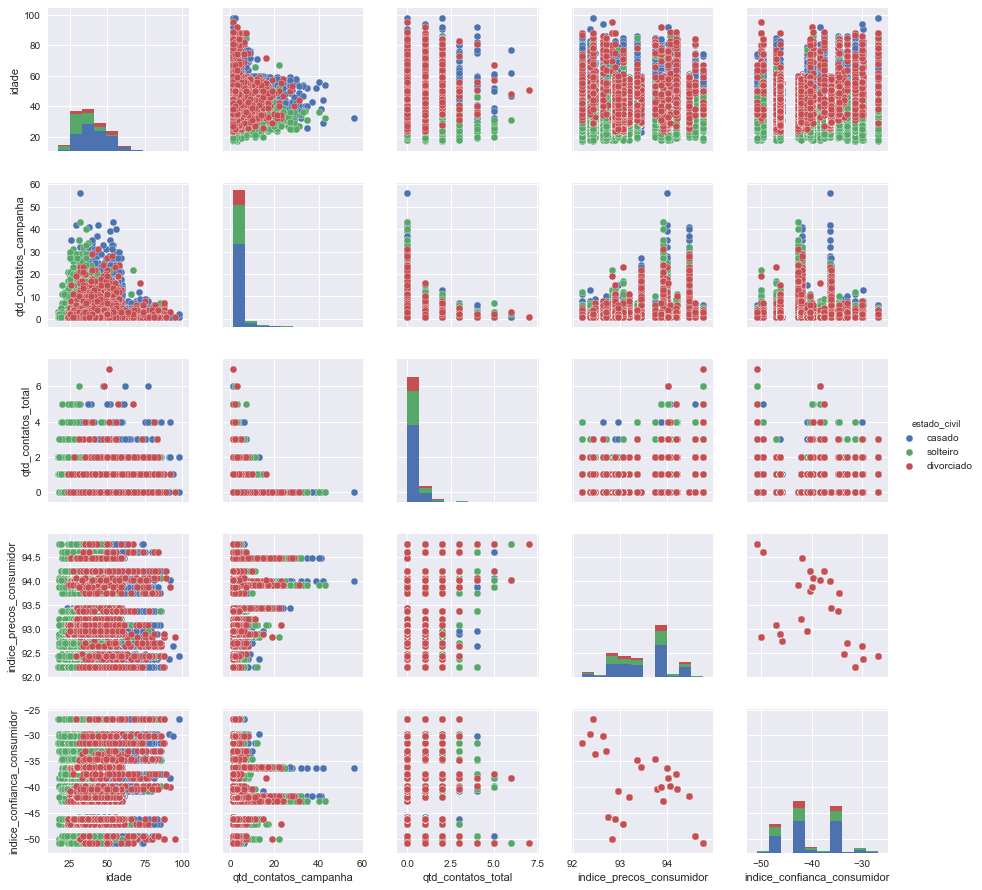

In [13]:
sns.pairplot(call_center, hue="estado_civil")

### Gráficos

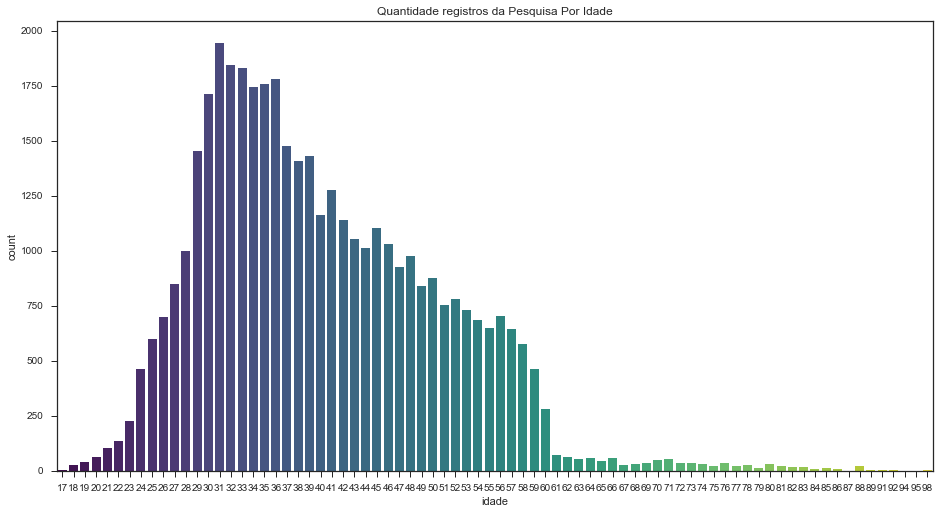

In [14]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15.7, 8.27)
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='idade', data=call_center, palette='viridis')
plt.title('Quantidade registros da Pesquisa Por Idade')

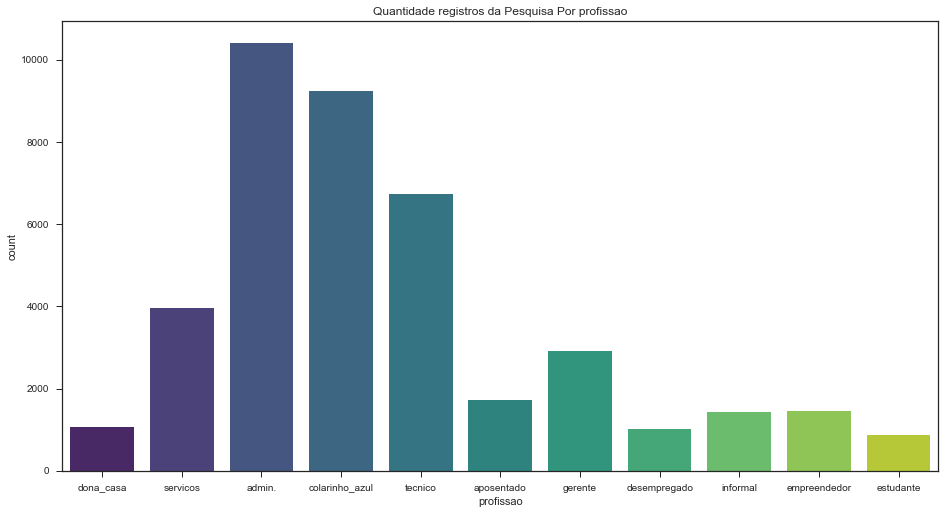

In [15]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15.7, 8.27)
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='profissao', data=call_center, palette='viridis')
plt.title('Quantidade registros da Pesquisa Por profissao')

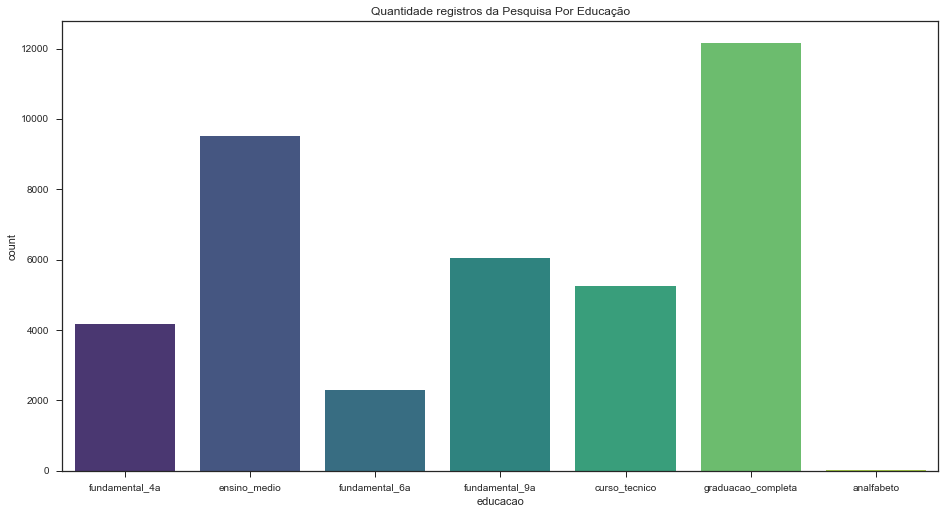

In [16]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15.7, 8.27)
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='educacao', data=call_center, palette='viridis')
plt.title('Quantidade registros da Pesquisa Por Educação')

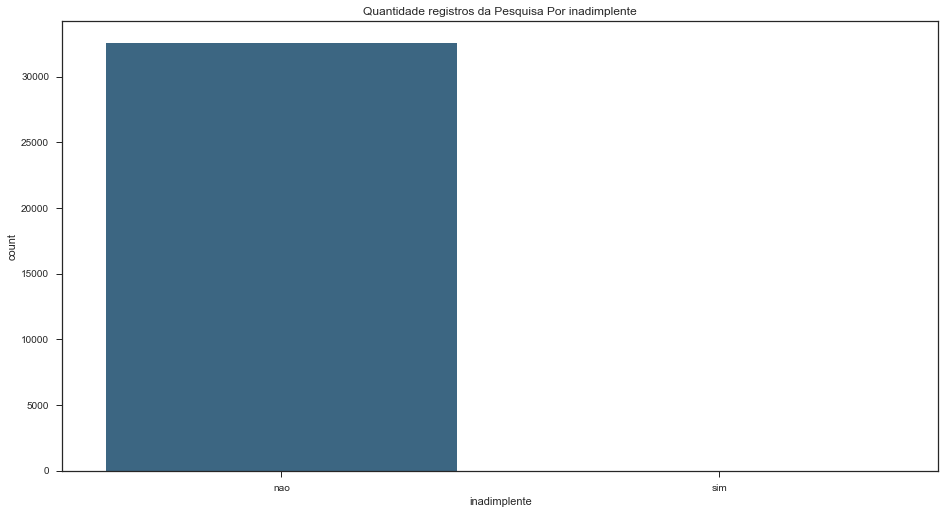

In [17]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15.7, 8.27)
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='inadimplente', data=call_center, palette='viridis')
plt.title('Quantidade registros da Pesquisa Por inadimplente')

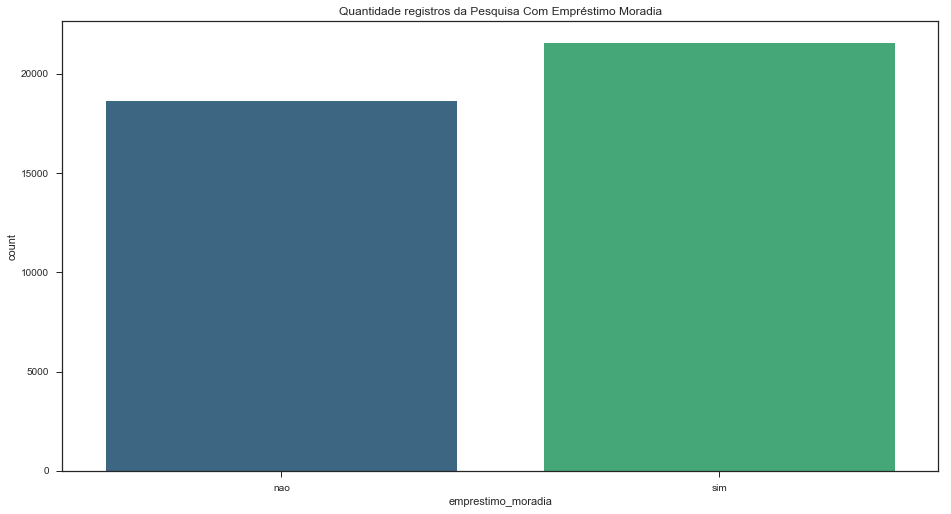

In [18]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15.7, 8.27)
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='emprestimo_moradia', data=call_center, palette='viridis')
plt.title('Quantidade registros da Pesquisa Com Empréstimo Moradia')

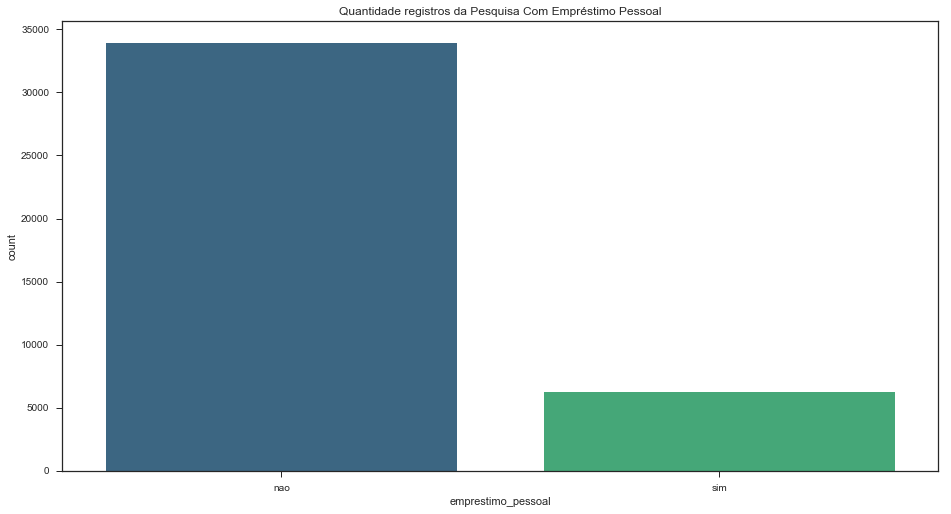

In [19]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15.7, 8.27)
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='emprestimo_pessoal', data=call_center, palette='viridis')
plt.title('Quantidade registros da Pesquisa Com Empréstimo Pessoal')

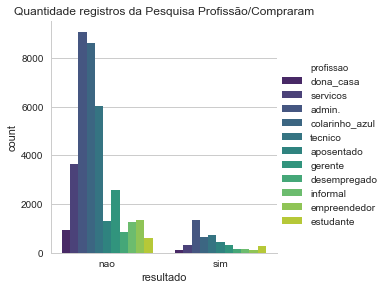

In [20]:
sns.factorplot(x='resultado', data=call_center, hue='profissao', kind='count', palette='viridis')
plt.title('Quantidade registros da Pesquisa Profissão/Compraram')

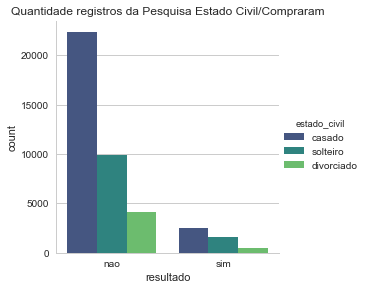

In [21]:
sns.factorplot(x='resultado', data=call_center, hue='estado_civil', kind='count', palette='viridis')
plt.title('Quantidade registros da Pesquisa Estado Civil/Compraram')

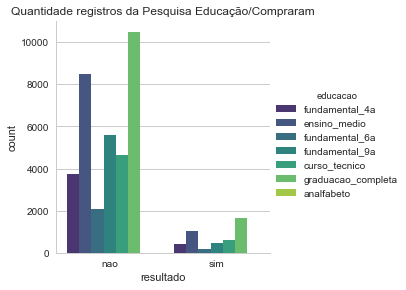

In [22]:
sns.factorplot(x='resultado', data=call_center, hue='educacao', kind='count', palette='viridis')
plt.title('Quantidade registros da Pesquisa Educação/Compraram')

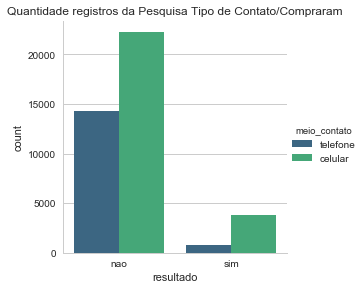

In [23]:
sns.factorplot(x='resultado', data=call_center, hue='meio_contato', kind='count', palette='viridis')
plt.title('Quantidade registros da Pesquisa Tipo de Contato/Compraram')

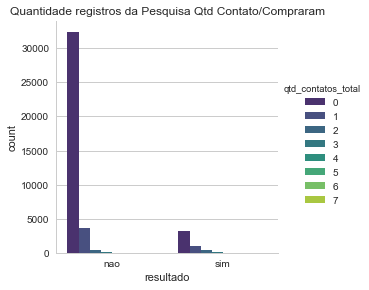

In [24]:

sns.factorplot(x='resultado', data=call_center, hue='qtd_contatos_total', kind='count', palette='viridis')
plt.title('Quantidade registros da Pesquisa Qtd Contato/Compraram')

### Análise de Outliers

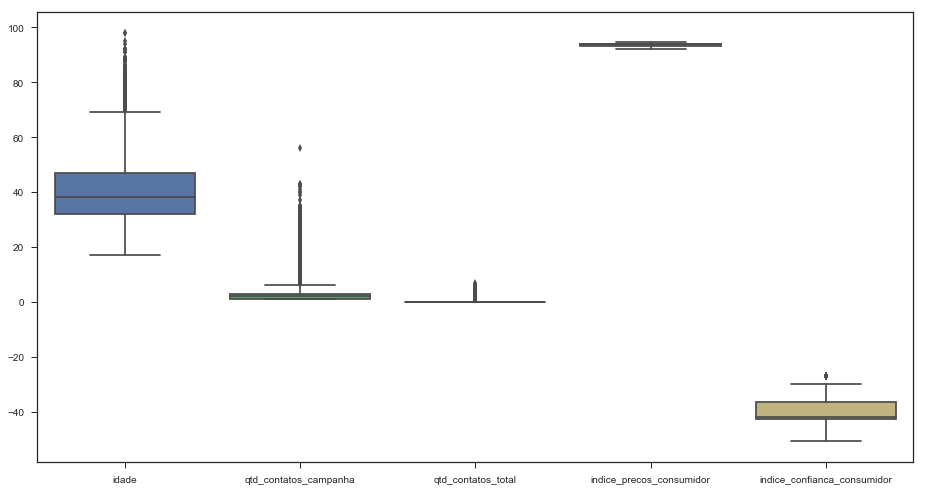

In [25]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 8.27)
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=call_center)
#####################################################################################################
# identificado outliers em várias colunas, mas o que vamos tomar como linha de analise é a "idade" 
# com base para analise com as outras colunas.

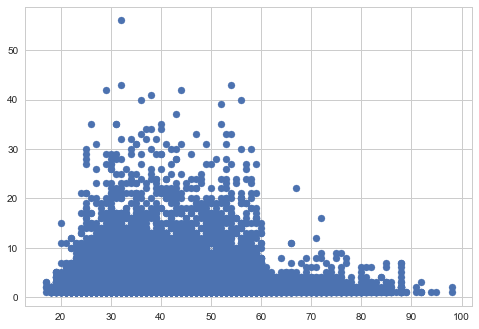

In [27]:
X = call_center['idade']
Y = call_center['qtd_contatos_campanha']
plt.scatter(X,Y)
plt.show()

### Estatística

#### Estatística descritiva

In [306]:
# Shape é o formarto do arquivo. Quantidade de linhas e colunas.
call_center.shape

(30488, 19)

In [307]:
# Apresenta todos os atributos e os tipos de entradas
call_center.dtypes

idade                          int64
profissao                      int64
estado_civil                   int64
educacao                       int64
inadimplente                   int64
emprestimo_moradia             int64
emprestimo_pessoal             int64
meio_contato                   int64
mes                            int64
dia_da_semana                  int64
duracao                        int64
qtd_contatos_campanha          int64
dias_ultimo_contato            int64
qtd_contatos_total             int64
campanha_anterior              int64
indice_precos_consumidor       int64
indice_confianca_consumidor    int64
numero_empregados              int64
resultado                      int64
dtype: object

In [28]:
call_center.corr()

,idade,qtd_contatos_campanha,qtd_contatos_total,indice_precos_consumidor,indice_confianca_consumidor
idade,1.000000,0.004594,0.024365,0.000857,0.129372
qtd_contatos_campanha,0.004594,1.000000,-0.079141,0.127836,-0.013733
qtd_contatos_total,0.024365,-0.079141,1.000000,-0.203130,-0.050936
indice_precos_consumidor,0.000857,0.127836,-0.203130,1.000000,0.058986
indice_confianca_consumidor,0.129372,-0.013733,-0.050936,0.058986,1.000000


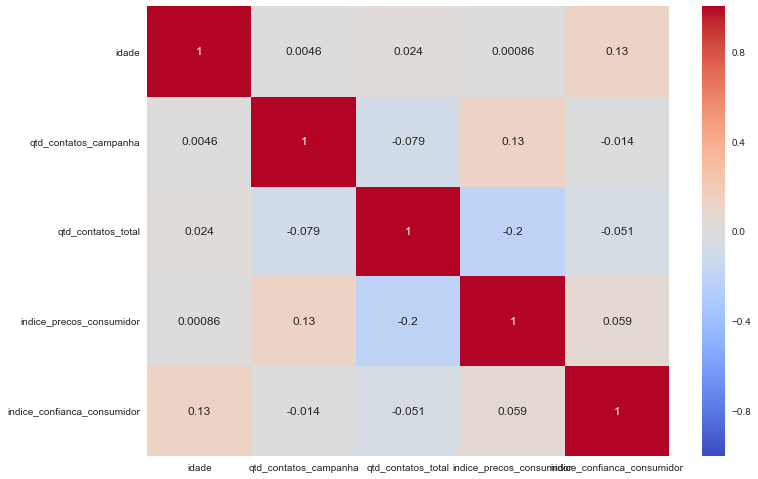

In [29]:
# Encontrar um correlação entre os valores númericos. No caso abaixo foi identificado um boa relação entre as colunas:
# plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(call_center.corr(),cmap='coolwarm',annot=True)

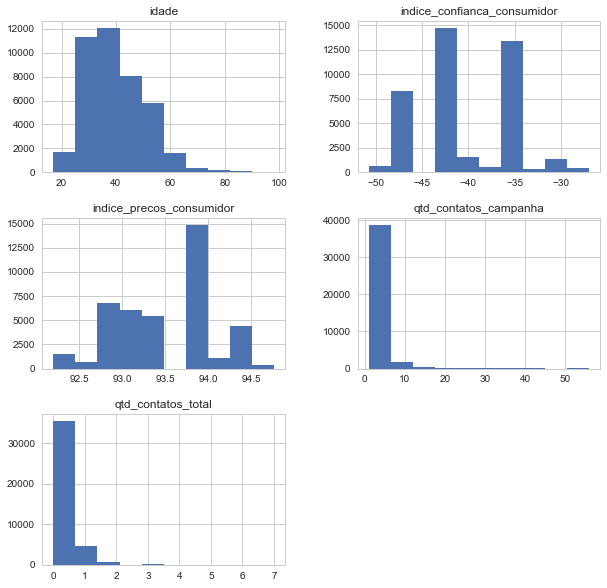

In [30]:
call_center.hist(figsize=(10,10));

#### Identificação das distribuições das variáveis

In [41]:
call_center = pd.read_csv('teste_tecnico/callcenter_marketing.csv')

In [33]:
# Saber se a distribuição é normal ou não:
# zero é simétrica
# positivo indica uma assimetria positiva 
# negativo indica uma assimetria negativa
call_center.skew()

Unnamed: 0                     0.000000
idade                          0.784697
duracao                        3.263141
qtd_contatos_campanha          4.762507
dias_ultimo_contato           -4.922190
qtd_contatos_total             3.832042
indice_precos_consumidor      -0.230888
indice_confianca_consumidor    0.303180
euribor3m                     -0.709188
numero_empregados             -1.044262
dtype: float64

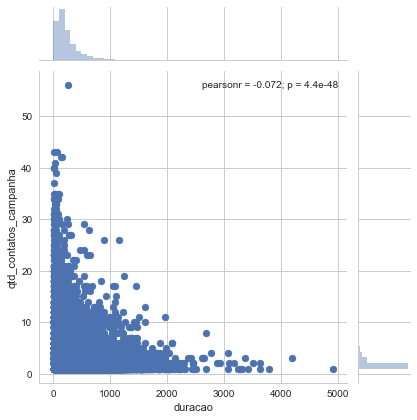

In [34]:
sns.jointplot(x='duracao', y='qtd_contatos_campanha', data=call_center)

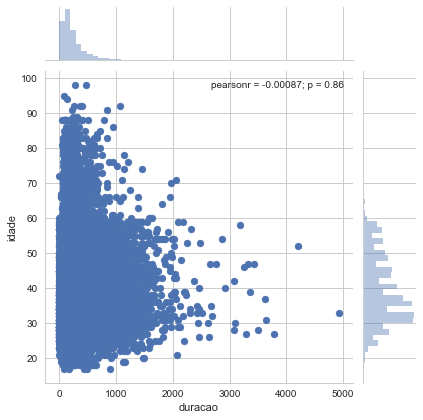

In [35]:
sns.jointplot(x='duracao', y='idade', data=call_center)

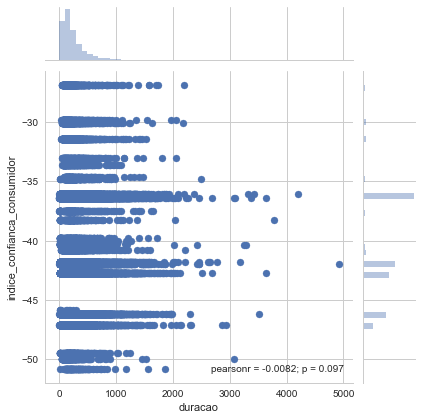

In [36]:
sns.jointplot(x='duracao', y='indice_confianca_consumidor', data=call_center)

### Modelagem

#### Manipulação dos dados para gerar os modelos Preditivos

In [269]:
#Carregar a planilha com os dados
call_center = pd.read_csv('teste_tecnico/callcenter_marketing.csv')

In [270]:
#excluindo algumas colunas
call_center.drop(['Unnamed: 0','euribor3m'], axis = 1, inplace = True)

In [271]:
call_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
idade                          41188 non-null int64
profissao                      40858 non-null object
estado_civil                   41108 non-null object
educacao                       39457 non-null object
inadimplente                   32591 non-null object
emprestimo_moradia             40198 non-null object
emprestimo_pessoal             40198 non-null object
meio_contato                   41188 non-null object
mes                            41188 non-null object
dia_da_semana                  41188 non-null object
duracao                        41188 non-null int64
qtd_contatos_campanha          41188 non-null int64
dias_ultimo_contato            41188 non-null int64
qtd_contatos_total             41188 non-null int64
campanha_anterior              41188 non-null object
indice_precos_consumidor       41188 non-null float64
indice_confianca_consumidor    41188 non-null f

In [272]:
call_center.dropna().head(5)

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,numero_empregados,resultado
0,56,dona_casa,casado,fundamental_4a,nao,nao,nao,telefone,mai,seg,261,1,999,0,nao_existente,93.994,-36.4,5191.0,nao
2,37,servicos,casado,ensino_medio,nao,sim,nao,telefone,mai,seg,226,1,999,0,nao_existente,93.994,-36.4,5191.0,nao
3,40,admin.,casado,fundamental_6a,nao,nao,nao,telefone,mai,seg,151,1,999,0,nao_existente,93.994,-36.4,5191.0,nao
4,56,servicos,casado,ensino_medio,nao,nao,sim,telefone,mai,seg,307,1,999,0,nao_existente,93.994,-36.4,5191.0,nao
6,59,admin.,casado,curso_tecnico,nao,nao,nao,telefone,mai,seg,139,1,999,0,nao_existente,93.994,-36.4,5191.0,nao


In [ ]:
# Remover colonus com valores nulos
call_center.dropna().head(5)

In [308]:
##### Converter atributos para 'Int' para modelos preditivos

In [273]:
call_center['profissao'].replace('admin.', 1,inplace=True)
call_center['profissao'].replace('colarinho_azul', 2,inplace=True)
call_center['profissao'].replace('tecnico', 3,inplace=True)
call_center['profissao'].replace('servicos', 4,inplace=True)
call_center['profissao'].replace('gerente', 5,inplace=True)
call_center['profissao'].replace('aposentado', 6,inplace=True)
call_center['profissao'].replace('empreendedor', 7,inplace=True)
call_center['profissao'].replace('informal', 8,inplace=True)
call_center['profissao'].replace('dona_casa', 9,inplace=True)
call_center['profissao'].replace('desempregado', 10,inplace=True)
call_center['profissao'].replace('estudante', 11,inplace=True)

In [274]:
call_center['estado_civil'].replace('casado', 1,inplace=True)
call_center['estado_civil'].replace('solteiro', 2,inplace=True)
call_center['estado_civil'].replace('divorciado', 3,inplace=True)

In [275]:
call_center['educacao'].replace('graduacao_completa', 1,inplace=True)
call_center['educacao'].replace('ensino_medio', 2,inplace=True)
call_center['educacao'].replace('fundamental_9a', 3,inplace=True)
call_center['educacao'].replace('curso_tecnico', 4,inplace=True)
call_center['educacao'].replace('fundamental_4a', 5,inplace=True)
call_center['educacao'].replace('fundamental_6a', 6,inplace=True)
call_center['educacao'].replace('analfabeto', 7,inplace=True)

In [276]:
call_center['inadimplente'].replace('nao', 1,inplace=True)
call_center['inadimplente'].replace('sim', 2,inplace=True)
call_center['inadimplente'].replace('NaN', 1,inplace=True)

In [277]:
call_center['emprestimo_moradia'].replace('nao', 1,inplace=True)
call_center['emprestimo_moradia'].replace('sim', 2,inplace=True)
call_center['emprestimo_moradia'].replace('NaN', 1,inplace=True)

In [278]:
call_center['emprestimo_pessoal'].replace('nao', 1,inplace=True)
call_center['emprestimo_pessoal'].replace('sim', 2,inplace=True)
call_center['emprestimo_pessoal'].replace('NaN', 1,inplace=True)

In [279]:
call_center['meio_contato'].replace('celular', 1,inplace=True)
call_center['meio_contato'].replace('telefone', 2,inplace=True)

In [280]:
call_center['mes'].replace('mai', 1,inplace=True)
call_center['mes'].replace('jul', 2,inplace=True)
call_center['mes'].replace('ago', 3,inplace=True)
call_center['mes'].replace('jun', 4,inplace=True)
call_center['mes'].replace('nov', 5,inplace=True)
call_center['mes'].replace('abr', 6,inplace=True)
call_center['mes'].replace('out', 7,inplace=True)
call_center['mes'].replace('set', 8,inplace=True)
call_center['mes'].replace('mar', 9,inplace=True)
call_center['mes'].replace('dez', 10,inplace=True)

In [281]:
call_center['dia_da_semana'].replace('seg', 1,inplace=True)
call_center['dia_da_semana'].replace('ter', 2,inplace=True)
call_center['dia_da_semana'].replace('qua', 3,inplace=True)
call_center['dia_da_semana'].replace('qui', 4,inplace=True)
call_center['dia_da_semana'].replace('sex', 5,inplace=True)

In [282]:
call_center['campanha_anterior'].replace('nao_existente', 1,inplace=True)
call_center['campanha_anterior'].replace('fracasso', 2,inplace=True)
call_center['campanha_anterior'].replace('sucesso', 3,inplace=True)

In [283]:
call_center['resultado'].replace('nao', 1,inplace=True)
call_center['resultado'].replace('sim', 2,inplace=True)

In [286]:
call_center = call_center[~call_center['profissao'].isnull()]
call_center = call_center[~call_center['estado_civil'].isnull()]
call_center = call_center[~call_center['educacao'].isnull()]
call_center = call_center[~call_center['inadimplente'].isnull()]
call_center = call_center[~call_center['emprestimo_pessoal'].isnull()]
call_center = call_center[~call_center['emprestimo_moradia'].isnull()]

In [287]:
call_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 19 columns):
idade                          30488 non-null int64
profissao                      30488 non-null float64
estado_civil                   30488 non-null float64
educacao                       30488 non-null float64
inadimplente                   30488 non-null float64
emprestimo_moradia             30488 non-null float64
emprestimo_pessoal             30488 non-null float64
meio_contato                   30488 non-null int64
mes                            30488 non-null int64
dia_da_semana                  30488 non-null int64
duracao                        30488 non-null int64
qtd_contatos_campanha          30488 non-null int64
dias_ultimo_contato            30488 non-null int64
qtd_contatos_total             30488 non-null int64
campanha_anterior              30488 non-null int64
indice_precos_consumidor       30488 non-null float64
indice_confianca_consumidor    30488 non-null

In [290]:
cols = ['estado_civil','profissao','educacao','inadimplente','emprestimo_pessoal','emprestimo_moradia','indice_precos_consumidor','indice_confianca_consumidor','numero_empregados']
call_center[cols] = call_center[cols].applymap(np.int64)

In [291]:
call_center = call_center[~call_center['estado_civil'].isnull()]
call_center = call_center[~call_center['profissao'].isnull()]
call_center = call_center[~call_center['educacao'].isnull()]
call_center = call_center[~call_center['inadimplente'].isnull()]
call_center = call_center[~call_center['emprestimo_moradia'].isnull()]
call_center = call_center[~call_center['emprestimo_pessoal'].isnull()]

In [292]:
call_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 19 columns):
idade                          30488 non-null int64
profissao                      30488 non-null int64
estado_civil                   30488 non-null int64
educacao                       30488 non-null int64
inadimplente                   30488 non-null int64
emprestimo_moradia             30488 non-null int64
emprestimo_pessoal             30488 non-null int64
meio_contato                   30488 non-null int64
mes                            30488 non-null int64
dia_da_semana                  30488 non-null int64
duracao                        30488 non-null int64
qtd_contatos_campanha          30488 non-null int64
dias_ultimo_contato            30488 non-null int64
qtd_contatos_total             30488 non-null int64
campanha_anterior              30488 non-null int64
indice_precos_consumidor       30488 non-null int64
indice_confianca_consumidor    30488 non-null int64
numero_

#### Modelagem

In [295]:
##### Random Forest (Floresta aleatória) na classificação manual

In [296]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Carregar os dados:
array = call_center.values

# Separar array em componentes de input e output:
x = array[:,0:17]
y = array[:,18]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
num_arvores = 15
max_features = 3
modelo = RandomForestClassifier(n_estimators=num_arvores,max_features=max_features)
modelo.fit(x_treino, y_treino)

# # matriz de confusão:
pred_rf = modelo.predict(x_teste)
mat = confusion_matrix(y_teste, pred_rf)
print("Matriz de confusão: \n"+str(mat))

# #acurácia:
acuracia = modelo.score(x_teste,y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

Matriz de confusão: 
[[7635  348]
 [ 604  560]]

Acurácia: 89.59221602711271%


In [297]:
#### Naive Bayes na classificação Manual

In [298]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Carregar os dados:
array = call_center.values

# Separar array em componentes de input e output:
x = array[:,1:17]
y = array[:,18]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = GaussianNB()
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred_nb = modelo.predict(x_teste)
mat = confusion_matrix(y_teste, pred_nb)
print("Matriz de confusão: \n"+str(mat))

#acurácia:
acuracia = modelo.score(x_teste,y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

Matriz de confusão: 
[[7365  618]
 [ 611  553]]

Acurácia: 86.56390073248059%


In [299]:
#### KNN na classificação Manual

In [300]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Carregar os dados:
array = call_center.values

# Separar array em componentes de input e output:
x = array[:,1:17]
y = array[:,18]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = KNeighborsClassifier()
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred_knn = modelo.predict(x_teste)
mat = confusion_matrix(y_teste, pred_knn)
print("Matriz de confusão: \n"+str(mat))

#acurácia:
acuracia = modelo.score(x_teste,y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

Matriz de confusão: 
[[7653  330]
 [ 664  500]]

Acurácia: 89.13304908713239%


In [301]:
#### SVM na classificação Manual

In [302]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Carregar os dados:
array = call_center.values

# Separar array em componentes de input e output:
x = array[:,1:17]
y = array[:,18]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = SVC()
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred = modelo.predict(x_teste)
mat = confusion_matrix(y_teste,pred)
print("Matriz de confusão: \n"+str(mat))

#acurácia:
acuracia = modelo.score(x_teste,y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

Matriz de confusão: 
[[7892   91]
 [1035  129]]

Acurácia: 87.68995299005138%


In [ ]:
#### Arvore de decisão na classificação Manual

In [303]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Carregar os dados:
array = call_center.values

# Separar array em componentes de input e output:
x = array[:,1:17]
y = array[:,18]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred_tree = modelo.predict(x_teste)
mat = confusion_matrix(y_teste, pred_tree)
print("Matriz de confusão: \n"+str(mat))

#acurácia:
acuracia = modelo.score(x_teste, y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

Matriz de confusão: 
[[7386  597]
 [ 586  578]]

Acurácia: 87.06679785722095%


In [ ]:
#### Regressão Logistica na classificação Manual

In [304]:
# Import dos módulos
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Carregar os dados:
array = call_center.values

# Separar array em componentes de input e output:
x = array[:,1:17]
y = array[:,18]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = LogisticRegression()
modelo.fit(x_treino, y_treino)

# matriz de confusão:
pred_lr = modelo.predict(x_teste)
mat = confusion_matrix(y_teste, pred_lr)
print("Matriz de confusão: \n"+str(mat))
# verdadeiro/verdadeiro | falso/verdadeiro
# verdadeiro/false      | falso/falso

#acurácia:
acuracia = modelo.score(x_teste,y_teste)
print("\nAcurácia: "+str(acuracia*100)+"%")

Matriz de confusão: 
[[7768  215]
 [ 755  409]]

Acurácia: 89.39543019569258%


#### Escolha do melhor modelo

In [309]:
#### ESCOLHIDO O ALGORITMO DE CLASSIFICAÇÃO POR ARVORE
# Assim, realiza novamente o load do modelo com os dados originais, 500 primeiros e depois de criado o modelo Realizamos,
# a predição dos outros clientes da lista de dados A predição determina para qual classe de cliente cada cliente pertence: A, B ou C

In [311]:
call_center.shape

(30488, 19)

In [319]:
df_cc_treine = call_center[:15000]
df_cc_not_treine = call_center[15000:]

In [320]:
from pandas import read_csv
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Carregar os dados:
array = df_cc_treine.values

# Separar array em componentes de input e output:
x = array[:,1:17]
y = array[:,18]

# Definir tamanho das amostras:
teste_size = 0.3

# Garantir que os resultados podem ser reproduzidos no estado randômico:
seed = 7

# Criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(x, y, test_size = teste_size, random_state = seed)

# Criação do modelo
#modelo = DecisionTreeClassifier()
#modelo.fit(x_treino, y_treino)

#############################################################
# Criação do modelo
num_arvores = 15
max_features = 3
modelo = RandomForestClassifier(n_estimators=num_arvores,max_features=max_features)
modelo.fit(x_treino, y_treino)
#############################################################

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [321]:
# Remove a coluna do 'Resultado'
array_nh = df_cc_not_treine.values

# A lista a ser predita eh dos dados sem Resultado
x_pred = array_nh[:,1:17]

In [323]:
array_nh

array([[  33,   10,    1, ...,  -36, 5228,    1],
       [  33,   10,    1, ...,  -36, 5228,    1],
       [  31,    3,    2, ...,  -36, 5228,    1],
       ...,
       [  56,    6,    1, ...,  -50, 4963,    1],
       [  44,    3,    1, ...,  -50, 4963,    1],
       [  74,    6,    1, ...,  -50, 4963,    1]], dtype=int64)

In [324]:
x_pred

array([[ 10,   1,   1, ...,   1,  93, -36],
       [ 10,   1,   1, ...,   1,  93, -36],
       [  3,   2,   4, ...,   1,  93, -36],
       ...,
       [  6,   1,   1, ...,   1,  94, -50],
       [  3,   1,   4, ...,   1,  94, -50],
       [  6,   1,   4, ...,   2,  94, -50]], dtype=int64)

In [325]:
#Predição do restanto dos dados
pred_new = modelo.predict(x_pred)
new_pd = pd.DataFrame()

In [326]:
pred_new

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [327]:
new_pd

""


In [317]:
df_cc_not_treine['resultado'] = pred_new

C:\Users\jeans\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [328]:
df_cc_not_treine.head(10)

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,numero_empregados,resultado
22484,33,10,1,1,1,1,1,1,3,5,115,1,999,0,1,93,-36,5228,1
22485,33,10,1,1,1,2,2,1,3,5,78,1,999,0,1,93,-36,5228,1
22488,31,3,2,4,1,2,2,1,3,5,73,1,999,0,1,93,-36,5228,1
22489,32,1,2,2,1,2,1,1,3,5,136,1,999,0,1,93,-36,5228,1
22490,46,2,1,6,1,2,1,1,3,5,119,1,999,0,1,93,-36,5228,1
22491,46,2,1,6,1,2,1,1,3,5,314,1,999,0,1,93,-36,5228,1
22496,31,3,2,4,1,2,1,1,3,5,129,3,999,0,1,93,-36,5228,1
22499,30,3,2,4,1,2,1,1,3,5,358,2,999,0,1,93,-36,5228,1
22500,29,3,2,1,1,2,2,1,3,5,73,9,999,0,1,93,-36,5228,1
22501,30,3,2,1,1,2,1,1,3,5,55,3,999,0,1,93,-36,5228,1
